In [124]:
from tslearn.clustering import TimeSeriesKMeans
from tslearn.generators import random_walks
from matplotlib.patches import Rectangle

import stumpy
import matrixprofile as mp

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import ast

# Reading DF from .csv

In [125]:
daily_stats = pd.read_csv('daily_stats_user.csv', lineterminator='\n', index_col=0)

### Converting str time series into array

In [126]:
daily_stats['success_ts'] = daily_stats.success_ts.apply(ast.literal_eval)

In [127]:
X_bot = []
X_nonbot = []
for row in daily_stats.itertuples():
    if row.bot == 1:
        X_bot.append(row.success_ts)
    else:
        X_nonbot.append(row.success_ts)
X_bot = np.array(X_bot)
X_nonbot = np.array(X_nonbot)
X = np.concatenate((X_bot, X_nonbot))

In [128]:
# bot_avg = [0]*319
# nonbot_avg = [0]*319
avg = [0]*319
for lst in X:
    for i in range(0,len(lst)):
        avg[i] = avg[i] + lst[i]
avg = [el/319 for el in avg]

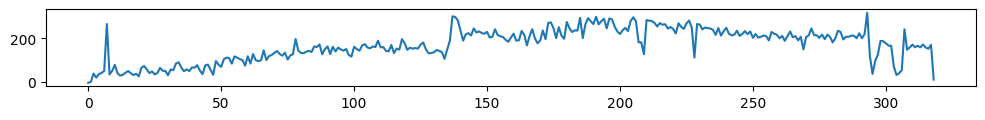

In [129]:
plt.figure(figsize=(12,1))
plt.plot(avg)
plt.show()

In [130]:
len(avg)

319

In [132]:
window_size = 7

[<Figure size 1500x700 with 5 Axes>]

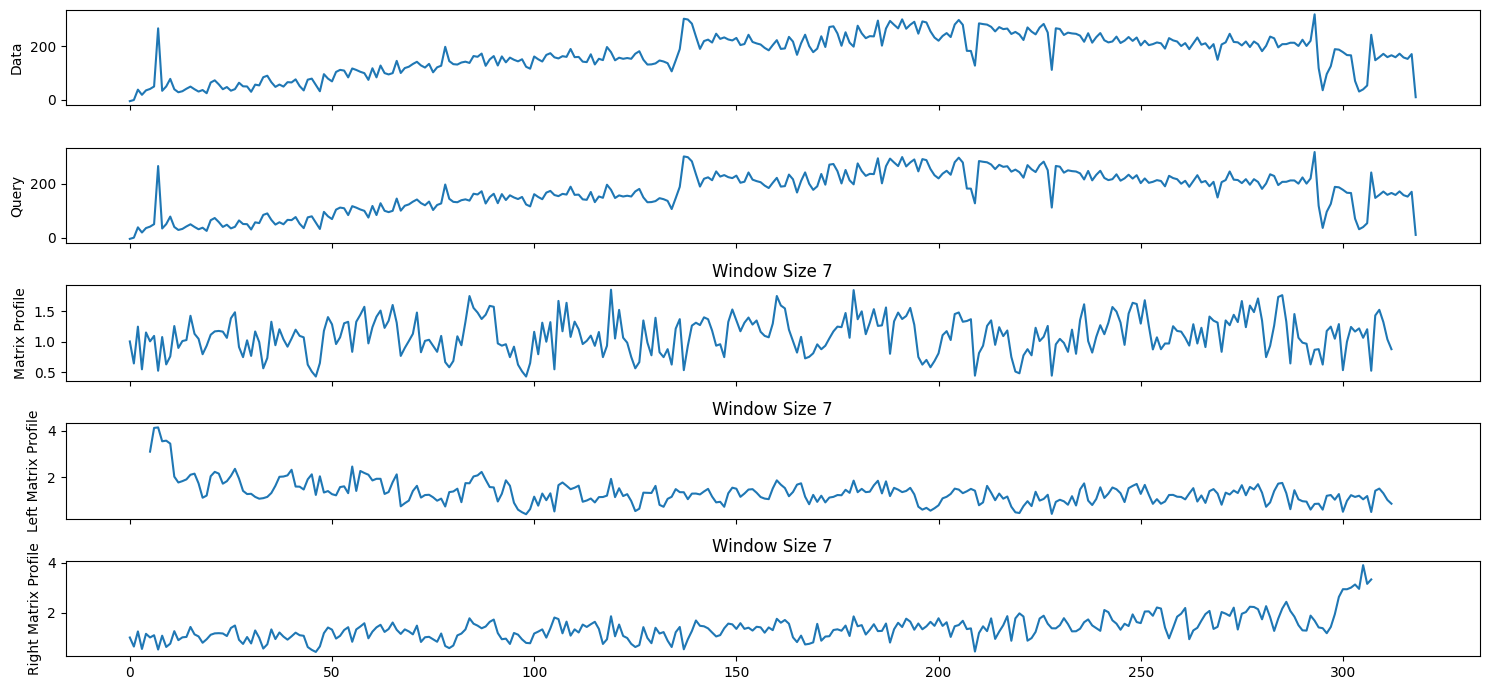

In [136]:
profile = mp.algorithms.stomp(avg, window_size)

mp.visualize(profile)
#plt.show()

[<Figure size 1500x700 with 5 Axes>,
 <Figure size 1500x700 with 8 Axes>,
 <Figure size 1500x700 with 4 Axes>]

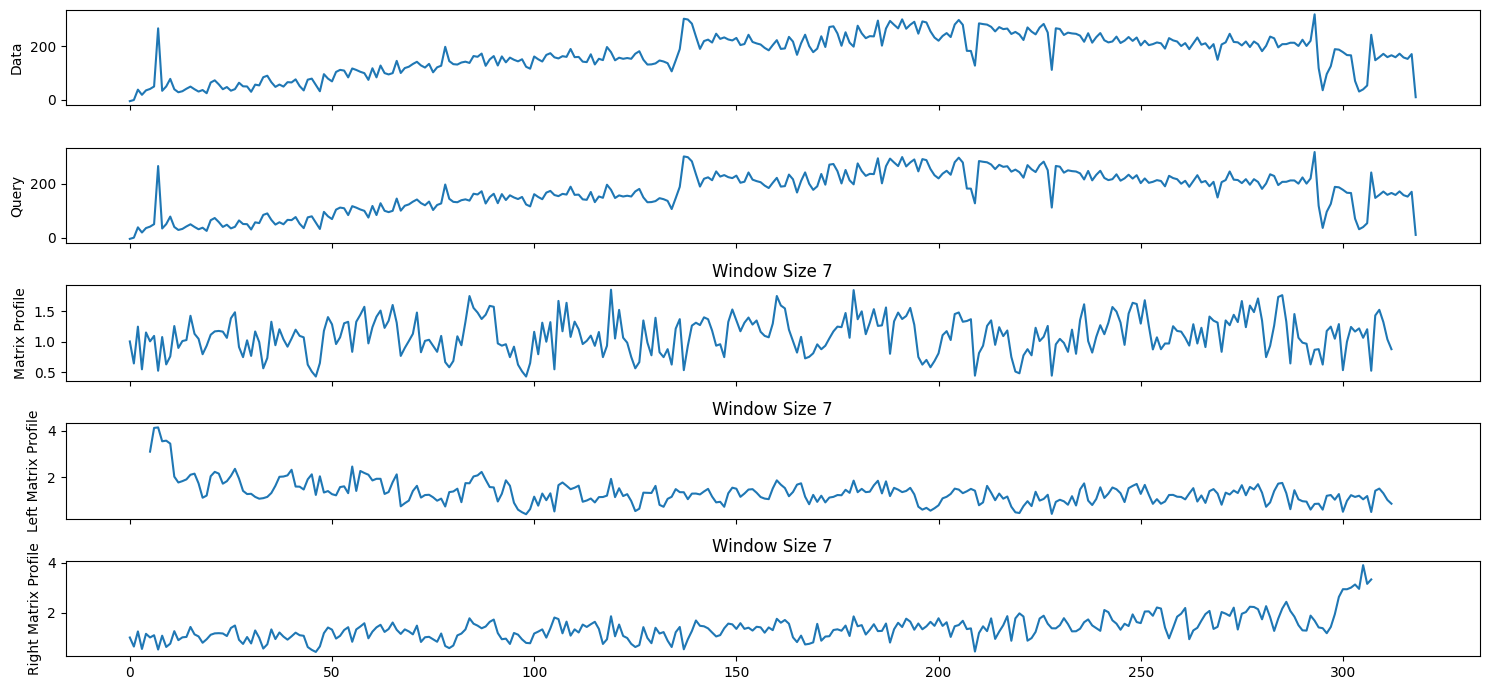

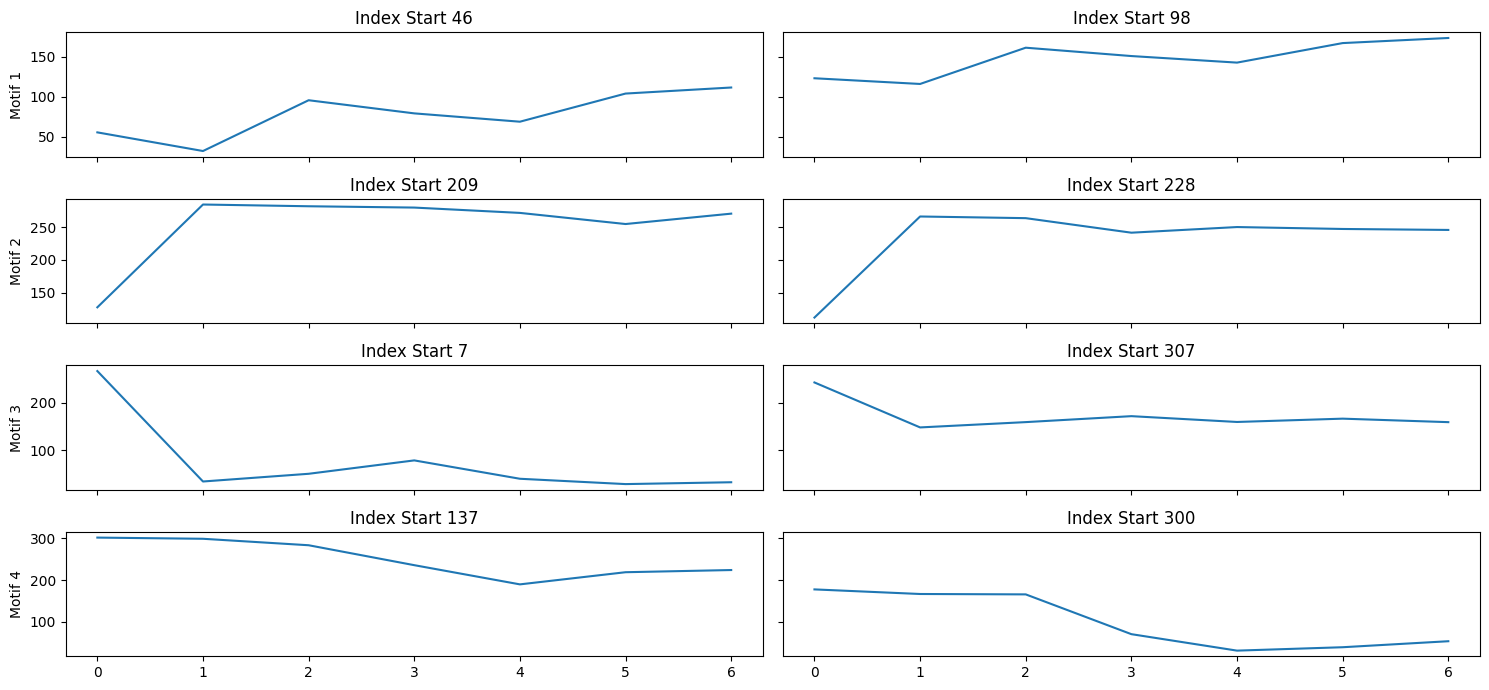

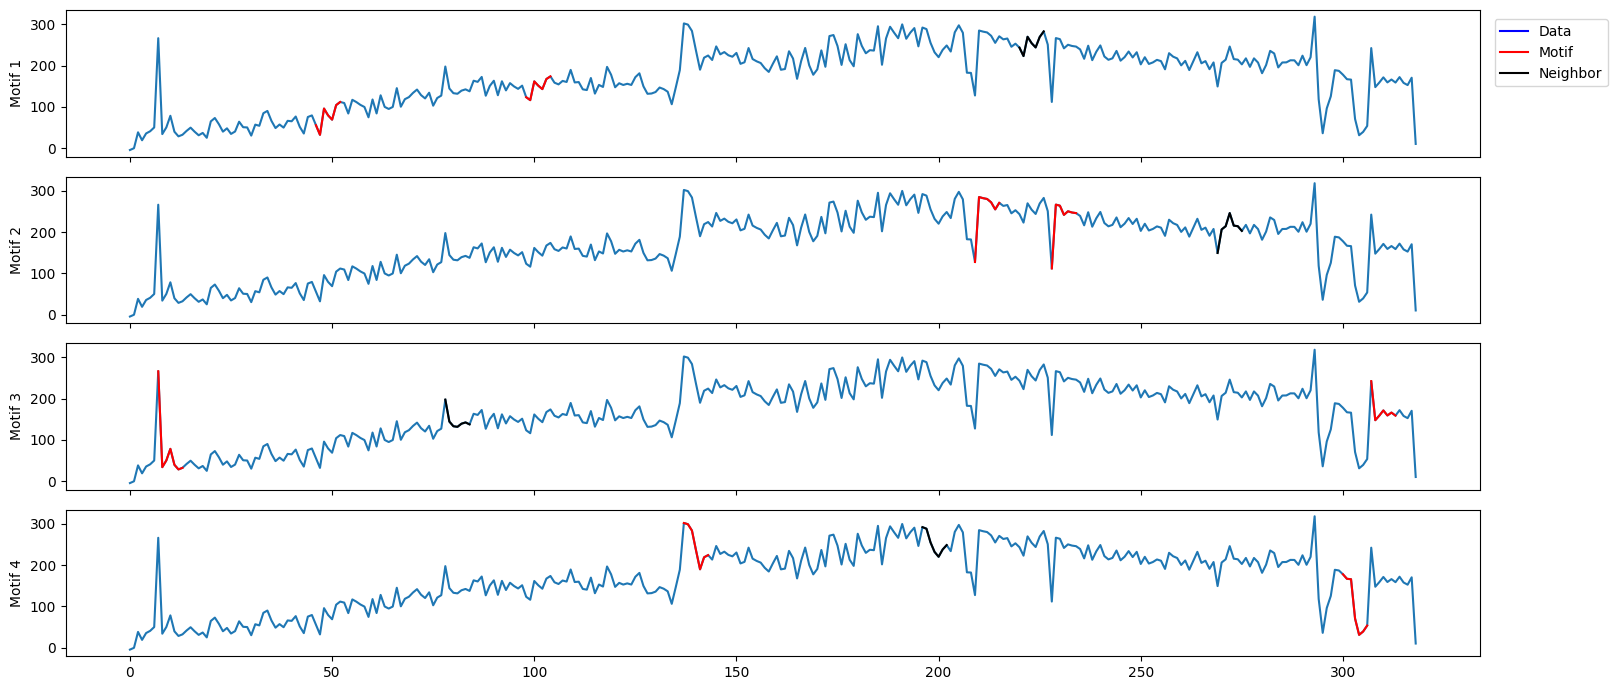

In [144]:
motif = mp.discover.motifs(profile, k=4, max_neighbors=1)
mp.visualize(motif)

In [ ]:
# profile = mp.compute(avg, windows=window_size)
# profile = mp.discover.motifs(profile, k=1)
# figures = mp.visualize(profile)